In [1]:
import numpy as np
from astropy.io import ascii
from pylab import *
from astropy.table import Table, vstack
import pandas as pd
from expecto import get_spectrum
from scipy.interpolate import RegularGridInterpolator as rgi
from itertools import product
%run Interpolate.ipynb
%run GetSpectra.ipynb
%run Binning.ipynb

In [2]:
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

'''
reads in .dat files. col1 is wavelength, col2 is transmission. Files are labeled with water content level in mm 
water content levels are listed in the array above. resolution is 200,000.
'''

d = {}
i=0
for n in water_array:
    water_content = str(water_array[i])
    d["data"+water_content] = ascii.read("transmission{0}_hi_res.dat".format(water_content))
    d["data"+water_content+"_pd"] = d["data"+water_content].to_pandas()
    #print(d["data"+water_content+"_pd"])
    i+=1

In [3]:
'''
for loop creates transmission values in shape necessary for interpolation function
'''
water_array = [1.0, 1.5, 2.5, 3.5, 5.0]

flux_array = []
i=0
for n in water_array:
    water_array_i = str(water_array[i])
    d["flux"+water_array_i] = np.array(d["data"+water_array_i+"_pd"]["col2"])
    flux_array.append(d["flux"+water_array_i])
    i+=1

In [4]:
pwv = np.load("pwv_target.npy")

In [45]:
def diff_spec(target_temp, ref_temp, target_pwv, ref_pwv, wave_in, wave_out, res=200, exp_time = 3600, throughput = .4):
    target_spec = spectrum(target_temp)
    ref_spec = spectrum(ref_temp)
    target_binned = binned_flux_pwv(target_spec, wave_in, wave_out, res)
    ref_binned = binned_flux_pwv(ref_spec, wave_in, wave_out, res)
    target_stacked = stacking(target_binned)
    ref_stacked = stacking(ref_binned)
    diff = division(target_stacked, ref_stacked)
    
    print(diff[0])
    
    normalized_array = []
    #photon_noise_array = 
    
    i=0
    for n in diff:
        photon_noise_i = photon_noise(diff[i], .5, exp_time, throughput)
        print(photon_noise_i)
        noisy_diff = diff[i]*photon_noise_i
        diff_mean = np.mean(diff[i])
        normalized = (diff[i]-diff_mean)/diff_mean
        normalized_array.append(normalized)
        #j=0
        #for n in normalized:
            #photon_noise(normalized[j], .5, exp_time, throughput
        #print(diff_mean)
        i+=1
    #diff_mean = np.mean(diff)
    #normalized = (diff-diff_mean)/diff_mean
    
    return normalized_array

In [63]:
def diff_spec(target_temp, ref_temp, target_pwv, ref_pwv, wave_in, wave_out, res=200, exp_time = 3600, throughput = .4):
    target_spec = spectrum(target_temp)
    ref_spec = spectrum(ref_temp)
    target_binned = binned_flux_pwv(target_spec, wave_in, wave_out, res)
    ref_binned = binned_flux_pwv(ref_spec, wave_in, wave_out, res)
    target_stacked = stacking(target_binned)
    ref_stacked = stacking(ref_binned)
    diff = division_noise(target_stacked, ref_stacked)
    
    #print(diff[0])
    
    normalized_array = []
    #photon_noise_array = 
    
    i=0
    for n in diff:
        '''
        input to photon noise needs to be actual flux value, not relative value after division. Needs to be multiplied into
        both target and ref fluxes?
        '''
        #photon_noise_i = photon_noise(diff[i], .5, exp_time, throughput)
        #print(photon_noise_i)
        #noisy_diff = diff[i]*photon_noise_i
        diff_mean = np.mean(diff[i])
        normalized = (diff[i]-diff_mean)/diff_mean
        normalized_array.append(normalized)
        #j=0
        #for n in normalized:
            #photon_noise(normalized[j], .5, exp_time, throughput
        #print(diff_mean)
        i+=1
    #diff_mean = np.mean(diff)
    #normalized = (diff-diff_mean)/diff_mean
    
    return normalized_array

In [71]:
#diff_spec = diff_spec(4000, 6000, pwv, pwv, 1.8, 1.95)

In [72]:
cold_test = spectrum(4000)
hot_test = spectrum(6000)

In [88]:
def division_noise(target_array, ref_array):
    new_array1 = []
    #new_array2
    i=0
    #for n in target_array[0]:
    '''
    this is test version, will need the above line with index for actual version since input will be nested array
    '''
    for n in target_array:
        #print(i)
        target_array_i = np.array(target_array[:,i])
        #print(target_array_i)
        ref_array_i = np.array(ref_array[:,i])
        target_noise = photon_noise(target_array_i)
        print(target_noise[0:10])
        ref_noise = photon_noise(ref_array_i)
        print(ref_noise[0:10])
        noisy_target_i = target_noise*target_array_i
        print(noisy_target_i[0:10])
        noisy_ref_i = ref_noise*ref_array_i
        print(noisy_ref_i[0:10])
        #print(ref_array_i)
        divided_i = noisy_target_i/noisy_ref_i
        print(divided_i)
        #new_array1 = np.append(new_array1, divided_i)
        new_array1.append(divided_i)
        #print(divided_i)
        i+=1
        #print(i)
    return new_array1

#cold_star_abs1_test3[:,0]


In [101]:
def division_noise_test(target_array, ref_array):
    new_array1 = []
    #new_array2
    i=0
    #for n in target_array[0]:
    '''
    this is test version, will need the above line with index for actual version since input will be nested array
    '''
    
    '''
    for n in target_array:
        #print(i)
        target_array_i = np.array(target_array[:,i])
        #print(target_array_i)
        ref_array_i = np.array(ref_array[:,i])
        
    '''
    target_noise = photon_noise(target_array)
    print(target_noise)
    ref_noise = photon_noise(ref_array)
    print(ref_noise)
    noisy_target = target_noise*target_array
    print(noisy_target)
    noisy_ref = ref_noise*ref_array
    print(noisy_ref)
        #print(ref_array_i)
    divided_i = noisy_target/noisy_ref
    print(divided_i)
        #new_array1 = np.append(new_array1, divided_i)
    #new_array1.append(divided_i)
        #print(divided_i)
        #i+=1
        #print(i)
    #return new_array1

#cold_star_abs1_test3[:,0]


In [117]:
cold_test_flux = np.array(cold_test.flux.value[1258332:1258342])
hot_test_flux = np.array(hot_test.flux.value[1258332:1258342])
#plt.plot(cold_test.flux.value)
cold_test_flux

array([3.3291372e+13, 3.3369321e+13, 3.3449899e+13, 3.3521098e+13,
       3.3576964e+13, 3.3614044e+13, 3.3632838e+13, 3.3635562e+13,
       3.3626880e+13, 3.3610229e+13], dtype=float32)

In [118]:
index = np.where(cold_test.wavelength.value == 19500)
index

#print(cold_test.wavelength)

(array([1258332]),)

In [119]:
division_noise_test(cold_test_flux, hot_test_flux)

[9.4129139e+16 9.4349531e+16 9.4577370e+16 9.4778675e+16 9.4936636e+16
 9.5041467e+16 9.5094622e+16 9.5102318e+16 9.5077768e+16 9.5030687e+16]
[0.99999999 1.         1.         0.99999999 1.         1.
 1.         1.         1.         1.00000001]
[1.7029915e+17 1.7038298e+17 1.7044760e+17 1.7050184e+17 1.7055080e+17
 1.7059639e+17 1.7063900e+17 1.7067877e+17 1.7071615e+17 1.7075402e+17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[3.32913713e+13 3.33693207e+13 3.34498996e+13 3.35210976e+13
 3.35769637e+13 3.36140435e+13 3.36328382e+13 3.36355624e+13
 3.36268801e+13 3.36102290e+13]
[6.02310023e+13 6.02606518e+13 6.02835024e+13 6.03026873e+13
 6.03199971e+13 6.03361241e+13 6.03511942e+13 6.03652620e+13
 6.03784867e+13 6.03918788e+13]
[0.55272816 0.55374975 0.55487651 0.55588066 0.5566473  0.55711307
 0.55728538 0.55720064 0.5569348  0.55653558]


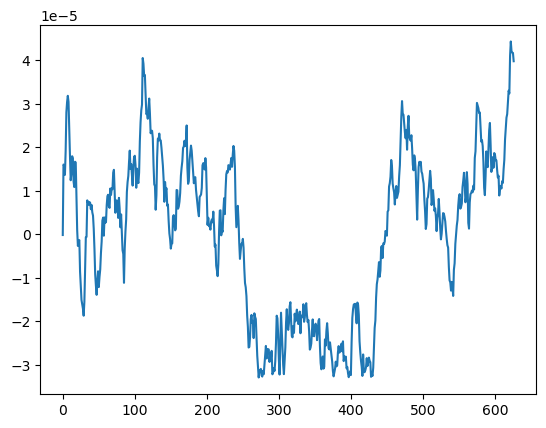

In [74]:
plt.plot(diff_spec[4])

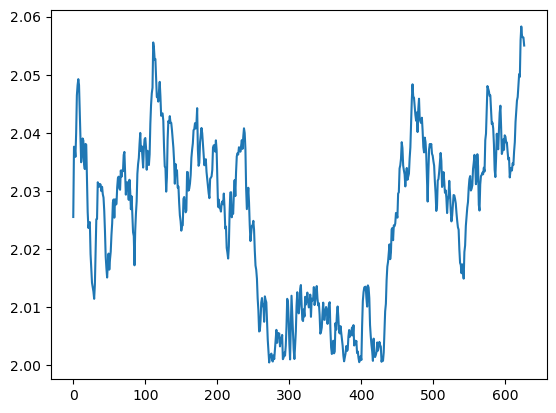

In [70]:
plt.plot(pwv)

In [ ]:
#diff_spec

In [ ]:
plt.plot(diff_spec[3])
#len(diff_spec[0])
#diff_spec

len(diff_spec[20])

In [ ]:
np.pi

In [160]:
'''
calculates photon noise, normalized to 0. throughput and transmission are fractional values. Transmission is set up to be
calculated over array of water content values (for pwv timeseries). 

Questions: how do we get initial photon count from the star from the flux? In practice I think we could get that value
directly from Henrietta's CCD detectors, but how do we do it simulation?

I guess if it's normalized, it's really calculting a percentage value and not actual changes in flux, and any flux values
could be used.

What units for exposure time? (pwv time series, each point is 1 minute) (needs to compare to flux, meausured in photons/sec)

re-write in terms of gaussian

after re-writing: I'm getting significantly different values from the gaussian and poisson distributions. It seems like 
poisson dist has much (orders of mag) larger std dev. Maybe I'm using the np version of the random generator wrong?
I thought poisson std dev was supposed to decrease with point count, but it still seems large even with values of 10**14

missing bin size, should be low resolution bin size
'''

def photon_noise(flux, mirror_diameter = 1, exp_time = 60, throughput = .4, bin_size):
    #mirror_area = np.pi*(mirror_diameter/2)**2
    mirror_area = np.pi*((mirror_diameter/2)**2) - np.pi*((.25)**2)
    print("mirror area:"+str(mirror_area))
    #transmission = interpolate_water(water, wave)
    num_photons = flux*mirror_area*exp_time*throughput*bin_size
    print("num photons:"+str(num_photons))
    noise_std_dev = 1/(num_photons**(1/2))
    print("noise std dev:"+str(noise_std_dev))
    #photon_noise = np.random.poisson(num_photons, 627)
    #noise_mean = np.mean(photon_noise)
    #noise_normalized = (photon_noise-noise_mean)/noise_mean
    photon_noise_gaussian = np.random.normal(1, noise_std_dev, len(flux))
    #return photon_noise
    return photon_noise_gaussian


'''
throughput of 0.4, swope is 1m in diameter, hole is .5m in diameter
'''

'\nthroughput of 0.4, swope is 1m in diameter, hole is .5m in diameter\n'

In [167]:
cold_index = np.where(cold_test.wavelength.value == 18000)
cold_index

cold_flux = cold_test.flux.value[1208332]
cold_flux

42405194000000.0

In [162]:
photon_noise(np.array([10**14, 10**14]))

mirror area:0.5890486225480862
num photons:[1.06028752e+12 1.06028752e+12]
noise std dev:[9.71154161e-07 9.71154161e-07]


array([0.99999872, 0.99999918])

In [157]:
(.25**2)*3.14

0.19625

In [32]:
'''
gaussian and poisson test
'''
num_photons = 10**3
std_dev = 1/(num_photons**(1/2))
poisson_test = np.random.poisson(num_photons, 20)
normal_test = np.random.normal(np.mean(num_photons), std_dev, 20)

print(poisson_test)
print(normal_test)

[1015 1014  975 1017  996 1040  990  990 1014  976 1025  948 1053  961
 1029  987 1046  970  963  974]
[1000.00225961  999.95605395  999.99930695  999.9867987  1000.00858914
  999.99168311  999.98622533 1000.0154422   999.99579277 1000.00193852
 1000.0074043   999.97230093  999.99515953  999.97010244  999.99506902
  999.99672986  999.9892256   999.98894955  999.95032596 1000.01193251]


In [36]:
'''
poisson std dev test
'''
num_photons_array = np.linspace(10**4, 10**14, 5)

std_dev_array = []


i=0
for n in num_photons_array:
    poisson_test_i = np.random.poisson(num_photons_array[i], 20)
    std_dev_i = np.std(poisson_test_i)
    std_dev_array.append(std_dev_i)
    i+=1

In [37]:
std_dev_array

[80.97745056495665,
 5106037.452856221,
 6588586.1604776215,
 8482477.175590608,
 9496725.200244343]

In [239]:
#photon_noise(10**4, .5, 3600, .4, 1900, pwv)

In [ ]:
poisson_test = np.random.poisson(3, 10)
poisson_test

In [ ]:
print(np.mean(poisson_test))

In [ ]:
def interpolate_water(water_content, wavelength):
    #water_content = [water_content]
    wavelength = [wavelength]
    wave_array = np.array(d["data1.0_pd"]["col1"])
    interp = rgi((water_array, wave_array), flux_array)
    result = list(product(water_content, wavelength))
    #print(result)
    return interp(result)

In [ ]:
'''
wave_array = np.array(d["data1.0_pd"]["col1"])
interp = rgi((water_array, wave_array), flux_array)
interp((2.0255216801286733, 1900))
'''

In [ ]:
'''
right now, wavelength has to be in nm. water content also has to be pwv timeseries.
'''


def photon_noise(mirror_diameter, exp_time, throughput, wave, water):
    mirror_area = np.pi*(mirror_diameter/2)**2
    transmission = interpolate_water(water, wave)
    num_photons = mirror_area*exp_time*throughput*transmission
    #noise_std_dev = 1/(num_photons**(1/2))
    photon_noise = np.random.poisson(num_photons, 627)
    #print(photon_noise)
    noise_mean = np.mean(photon_noise)
    noise_normalized = (photon_noise-noise_mean)/noise_mean
    return noise_normalized


photon_noise = photon_noise(10, 100, .8, 1000, pwv)
#interpolate_water(pwv, 1900)

In [ ]:
plt.hist(photon_noise)

In [191]:
cold_star = spectrum(4000)
hot_star = spectrum(6000)

In [192]:
binned_cold = binned_flux_pwv(cold_star, 1.8, 1.95, 200)
binned_hot = binned_flux_pwv(hot_star, 1.8, 1.95, 200)

In [210]:
print(binned_cold[0][1])
print(binned_hot[0][1])

[18000.         18180.         18361.8        18545.418
 18730.87218    18918.1809018  19107.36271082 19298.43633793
 19491.42070131]
[18000.         18180.         18361.8        18545.418
 18730.87218    18918.1809018  19107.36271082 19298.43633793
 19491.42070131]


In [211]:
stacked_cold = stacking(binned_cold)
stacked_hot = stacking(binned_hot)

In [212]:
print(stacked_cold)
print(stacked_hot)

(array([[3.86023809e+15, 1.92141684e+15, 8.38071309e+14, ...,
        1.26350500e+15, 1.82601304e+15, 2.85209222e+15],
       [3.85089639e+15, 1.91207900e+15, 8.31621228e+14, ...,
        1.25561582e+15, 1.81811074e+15, 2.84406099e+15],
       [3.85106658e+15, 1.91224912e+15, 8.31738735e+14, ...,
        1.25575954e+15, 1.81825470e+15, 2.84420731e+15],
       ...,
       [3.83636125e+15, 1.89754986e+15, 8.21585276e+14, ...,
        1.24334071e+15, 1.80581523e+15, 2.83156488e+15],
       [3.83640062e+15, 1.89758921e+15, 8.21612459e+14, ...,
        1.24337396e+15, 1.80584853e+15, 2.83159873e+15],
       [3.83746449e+15, 1.89865265e+15, 8.22347022e+14, ...,
        1.24427241e+15, 1.80674848e+15, 2.83251336e+15]]), array([18000.        , 18180.        , 18361.8       , 18545.418     ,
       18730.87218   , 18918.1809018 , 19107.36271082, 19298.43633793,
       19491.42070131]))
(array([[7.09878818e+15, 3.49343327e+15, 1.55828513e+15, ...,
        2.30311103e+15, 3.32578601e+15, 5.183029

In [189]:
#photon_noise(stacked[0], stacked[1])

array([18000.        , 18180.        , 18361.8       , 18545.418     ,
       18730.87218   , 18918.1809018 , 19107.36271082, 19298.43633793,
       19491.42070131])

In [214]:
#division(stacked_cold, stacked_hot)

In [221]:
%run Interpolate.ipynb

In [223]:
#division_noise(stacked_cold, stacked_hot)

In [240]:
#diff_spec2 = diff_spec(4000, 6000, pwv, pwv, 1.8, 1.95)

16

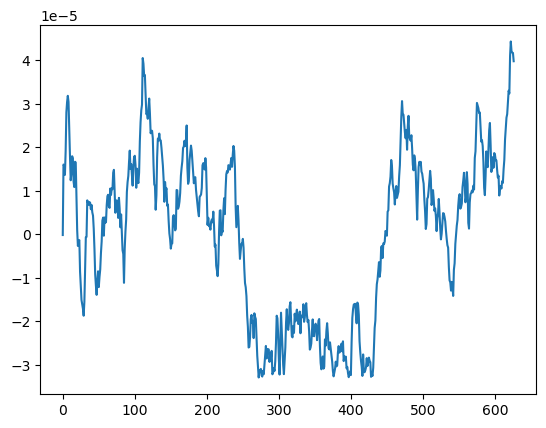

In [231]:
plt.plot(diff_spec2[4])
len(diff_spec2)

In [248]:
'''
calculates photon noise, normalized to 0. throughput and transmission are fractional values. Transmission is set up to be
calculated over array of water content values (for pwv timeseries). 

Questions: how do we get initial photon count from the star from the flux? In practice I think we could get that value
directly from Henrietta's CCD detectors, but how do we do it simulation?

I guess if it's normalized, it's really calculting a percentage value and not actual changes in flux, and any flux values
could be used.

What units for exposure time? (pwv time series, each point is 1 minute) (needs to compare to flux, meausured in photons/sec)

re-write in terms of gaussian

after re-writing: I'm getting significantly different values from the gaussian and poisson distributions. It seems like 
poisson dist has much (orders of mag) larger std dev. Maybe I'm using the np version of the random generator wrong?
I thought poisson std dev was supposed to decrease with point count, but it still seems large even with values of 10**14

missing bin size, should be low resolution bin size

Note: right now, bin sizes are in angstroms, since this is the unit that the hi-res flux comes with. Bin sizes are filtered
from binning function to stacking to division_noise to photon_noise. bin sizes for 1.8-1.95 microns are about 180-190 A. 
'''

def photon_noise_nobin(flux, bin_size, mirror_diameter = 1, exp_time = 60, throughput = .4):
    
    mirror_area = np.pi*((mirror_diameter/2)**2) - np.pi*((.25)**2)
    print("mirror area:"+str(mirror_area))
    
    #bin_size_array = [bin_array[1]-bin_array[0]]
    '''
    i=0
    for n in bin_array:
        if i == len(bin_array)-1:
            break
        bin_size2 = bin_array[i+1] - bin_array[i]
        bin_size_array.append(bin_size2)
        j+=1
    '''
    num_photons = flux*mirror_area*exp_time*throughput*bin_size
    print("num photons:"+str(num_photons))
    noise_std_dev = 1/(num_photons**(1/2))
    print("noise std dev:"+str(noise_std_dev))
    
    photon_noise_gaussian = np.random.normal(1, noise_std_dev, len(flux))
    
    return photon_noise_gaussian


'''
throughput of 0.4, swope is 1m in diameter, hole is .5m in diameter
'''

'\nthroughput of 0.4, swope is 1m in diameter, hole is .5m in diameter\n'

In [249]:
flux_array = np.array([10**10, 10**9, 10**8, 10**7, 10**6])

photon_noise(flux_array, 180)

mirror area:0.5890486225480862
num photons:[2.54469005e+13 2.54469005e+12 2.54469005e+11 2.54469005e+10
 2.54469005e+09]
noise std dev:[1.98236013e-07 6.26877315e-07 1.98236013e-06 6.26877315e-06
 1.98236013e-05]


array([0.99999973, 0.99999875, 0.99999904, 1.00000298, 1.00000478])

In [246]:
photon_noise_nobin(flux_array,180)

mirror area:0.5890486225480862
num photons:[2.54469005e+13 2.54469005e+12 2.54469005e+11]
noise std dev:[1.98236013e-07 6.26877315e-07 1.98236013e-06]


array([0.99999971, 0.99999972, 0.99999675])

In [2]:
from pylab import *
import expecto
import pysynphot


def normalize_expecto_to_magnitude(expecto_wave, expecto_flux, magnitude):

    expecto_flux /= 10**8 #to ergs/s/cm^2/Ang
    h = pysynphot.units.H # ergs * s
    c = pysynphot.units.C #meters/second
    c *= 10**10 #Angstroms/second

    ergs_to_photons = h*c/expecto_wave

    expecto_flux /= ergs_to_photons

    sp = pysynphot.ArraySpectrum(expecto_wave.value, expecto_flux.value)
    sp_norm = sp.renorm(magnitude, 'vegamag', pysynphot.ObsBandpass('2mass,j'))
    

    return sp_norm.wave, sp_norm.flux

/Users/tchawla/anaconda3/lib/python3.10/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/tchawla/Downloads/grp/redcat/trds/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


In [3]:
#pip install pysynphot

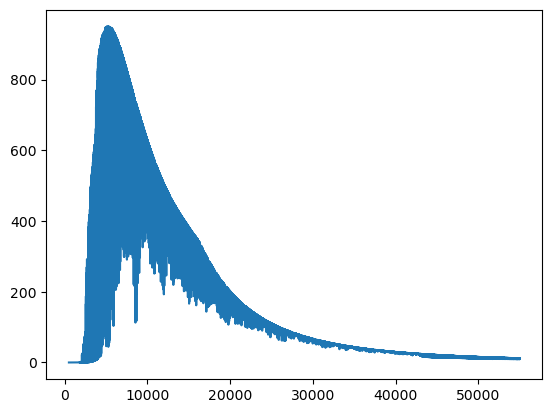

In [13]:
expecto_spectrum = get_spectrum(T_eff = 5800, log_g = 4.5, cache = False) #units are ergs/s/cm^2/cm

expecto_flux = expecto_spectrum.flux
expecto_wave = expecto_spectrum.wavelength

wave, flux = normalize_expecto_to_magnitude(expecto_wave, expecto_flux, -1)
plt.plot(wave, flux)
#plt.yscale('log')
plt.show()

In [14]:
len(flux)

flux[100000]

312.8614377572016

In [260]:
'''
from pylab import *
import expecto
import pysynphot


def normalize_expecto_to_magnitude(expecto_wave, expecto_flux, magnitude):

    expecto_flux /= 10**8 #to ergs/s/cm^2/Ang
    h = pysynphot.units.H # ergs * s
    c = pysynphot.units.C #meters/second
    c *= 10**10 #Angstroms/second

    ergs_to_photons = h*c/expecto_wave

    expecto_flux /= ergs_to_photons

    sp = pysynphot.ArraySpectrum(expecto_wave.value, expecto_flux.value)
    sp_norm = sp.renorm(magnitude, 'vegamag', pysynphot.ObsBandpass('2mass,j'))
    

    return sp_norm.wave, sp_norm.flux


if __name__ == "__main__":

    expecto_spectrum = expecto.get_spectrum(T_eff = 5800, log_g = 4.5, cache = False) #units are ergs/s/cm^2/cm

    expecto_flux = expecto_spectrum.flux
    expecto_wave = expecto_spectrum.wavelength

    wave, flux = normalize_expecto_to_magnitude(expecto_wave, expecto_flux, 10)
    plt.plot(wave, flux)
    plt.yscale('log')
    plt.show()
'''   



'\nfrom pylab import *\nimport expecto\nimport pysynphot\n\n\ndef normalize_expecto_to_magnitude(expecto_wave, expecto_flux, magnitude):\n\n    expecto_flux /= 10**8 #to ergs/s/cm^2/Ang\n    h = pysynphot.units.H # ergs * s\n    c = pysynphot.units.C #meters/second\n    c *= 10**10 #Angstroms/second\n\n    ergs_to_photons = h*c/expecto_wave\n\n    expecto_flux /= ergs_to_photons\n\n    sp = pysynphot.ArraySpectrum(expecto_wave.value, expecto_flux.value)\n    sp_norm = sp.renorm(magnitude, \'vegamag\', pysynphot.ObsBandpass(\'2mass,j\'))\n    \n\n    return sp_norm.wave, sp_norm.flux\n\n\nif __name__ == "__main__":\n\n    expecto_spectrum = expecto.get_spectrum(T_eff = 5800, log_g = 4.5, cache = False) #units are ergs/s/cm^2/cm\n\n    expecto_flux = expecto_spectrum.flux\n    expecto_wave = expecto_spectrum.wavelength\n\n    wave, flux = normalize_expecto_to_magnitude(expecto_wave, expecto_flux, 10)\n    plt.plot(wave, flux)\n    plt.yscale(\'log\')\n    plt.show()\n'

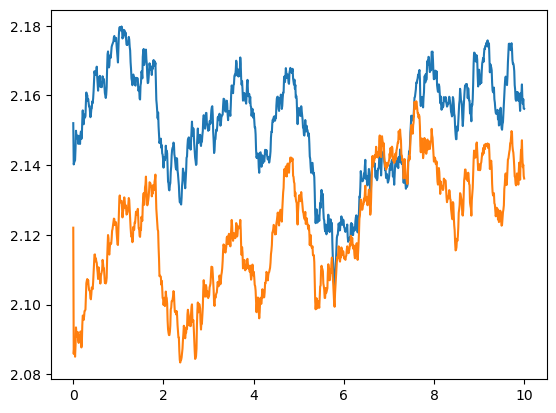

In [263]:
from pylab import *
from scipy.stats import binned_statistic

def P_pwv(v, c = 1e-7):

    return c * v**-2

def angular_correlation(separation):

    return np.exp(-0.5*(separation/45)**2)


def power_spectrum(N, omega_max, M, timestamps, mean = 0, target = True, phase = None, separation = None):

    delta_omega = omega_max / N
    A_n = np.array([2 * np.sqrt(P_pwv(n * delta_omega + .00001) * delta_omega) for n in range(N + 1)])
    A_n_zero = np.array([0 for n in range(N + 1, M)])
    A_n = np.concatenate((A_n, A_n_zero))

    
    if target:
        phi = np.random.uniform(0,2 * np.pi, M)
        B_n = np.exp(1.0j*phi)
        phase = B_n
        pwv = np.real(np.fft.fft(A_n*B_n)/2)
        
        pwv += mean
        pwv_delta_t = np.pi/omega_max
        pwv_t = np.arange(0, M*pwv_delta_t, pwv_delta_t)/3600
        binned_pwv, binned_pwv_t, _ = binned_statistic(pwv_t, pwv, bins = timestamps)
        binned_pwv = np.insert(binned_pwv, 0, np.mean(binned_pwv))

    else:
        B_n = phase
        phi = np.random.uniform(0, 2*np.pi, M)
        C_n = A_n*angular_correlation(separation)
        D_n = A_n*np.sqrt(1 - angular_correlation(separation)**2)
        E_n = np.exp(1.0j*phi)
        
        pwv = np.real(np.fft.fft(C_n*B_n + D_n*E_n)/2)
        
        pwv += mean
        
        pwv_delta_t = np.pi/omega_max
        pwv_t = np.arange(0, M*pwv_delta_t, pwv_delta_t)/3600
        binned_pwv, binned_pwv_t, _ = binned_statistic(pwv_t, pwv, bins = timestamps)
        binned_pwv = np.insert(binned_pwv, 0, np.mean(binned_pwv))


    return binned_pwv_t, binned_pwv, phase, mean

if __name__ == "__main__":

    timestamps = np.linspace(0,10,1000) #time in hours
    t, target_star_pwv, target_star_phase, target_star_mean = power_spectrum(12000, 1, 24000, timestamps, mean = 2)
    t1, comparison_star_pwv, _, _ = power_spectrum(12000, 1, 24000, timestamps, mean = target_star_mean, target = False, phase = target_star_phase, separation = 25)

    plt.plot(t, target_star_pwv)
    plt.plot(t, comparison_star_pwv)
    plt.show()


In [268]:
pwv = np.load("pwv_target.npy")

#diff_spec2 = diff_spec(4000, 6000, target_star_pwv, comparison_star_pwv, 1.8, 1.95)
diff_spec_initial = diff_spec(4000, 6000, pwv, pwv, 1.8, 1.95)

ValueError: There are 2 point arrays, but values has 1 dimensions

In [ ]:
target